# Classification on haberman cancer survival dataset.#
###Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer

-- 2 = the patient died within 5 year

DATA SET LINK:- https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival


 Imported some required libraries like pandas for dataframe, numpy for numercial computation, matplotlib and seaborn for data visualization.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/M.Tech(DSA)/CC GENERAL.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
haberman = pd.read_csv("/content/drive/My Drive/M.Tech(DSA)/haberman.csv")
haberman.head(6)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1


observation:- In the data set there are four attributes in which three are features and 1 is class attribute. features store information related to patient like age of the patient,year in which patient undergone surgery of breast cancer and  Number of positive axillary nodes detected. and  class attribute "status" which consist two values 1 and 2. 1  for the patient survived 5 years or longer and 2 for the patient died within 5 year.

In [51]:
haberman.tail(4)

,age,year,nodes,status
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [52]:
haberman.shape 

(306, 4)

Observation:-shape of the data set is (306,4) that means there are 306 rows and 4 columns in the data set

In [53]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Observation:-we can clearly seen that there are 4 columns age,year,nodes,status and there are no null and missing values in the whole dataset so there is no need of missing value treatment and we also seen that all the 4 colums containg integer data 

In [54]:
haberman.describe() 

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [55]:
haberman["status"].value_counts() 

1    225
2     81
Name: status, dtype: int64

Observation:-It is a inbalanced dataset, in the data set there are 225 patients out of 306 survive more than five year after the surgery and 81 patient are survive less than five year after the surgery

##Bivariate analysis

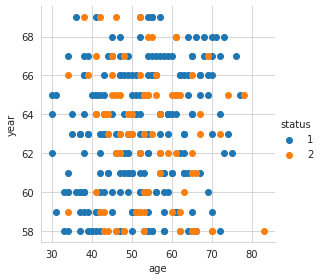

In [56]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4).map(plt.scatter, "age", "year").add_legend()
plt.show();

Observation:- From the above scatter plot between age and year. we are unable to distinguish 1 and 2.

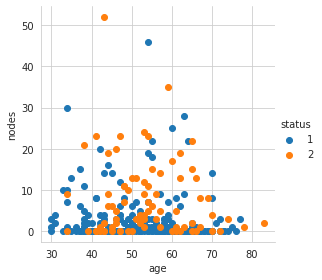

In [57]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4).map(plt.scatter, "age", "nodes").add_legend()
plt.show();

Observation:- From the above scatter plot we can make assumption that the person who have less no of nodes is higher chances to survive more than five year but still we are unable to distinguish 1 and 2.

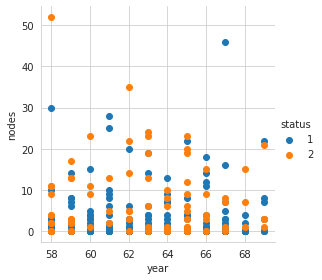

In [58]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4).map(plt.scatter, "year", "nodes").add_legend()
plt.show();


Observation:- from the above scatter plot between nodes and year still we are unable to distinguish 1 and 2 

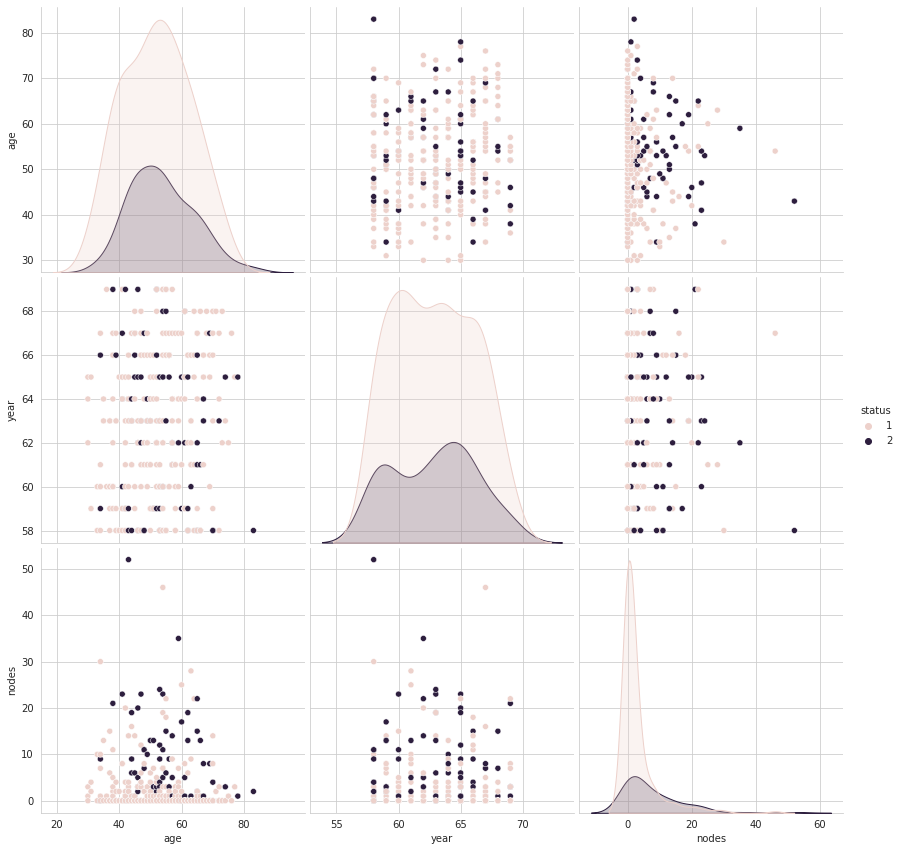

In [59]:
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="status",height=4)
plt.show()

#univariate analysis#

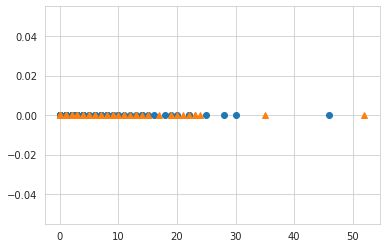

In [60]:
haber_1 = haberman.loc[haberman["status"]==1]
haber_2 = haberman.loc[haberman["status"]==2]
plt.plot(haber_1["nodes"],np.zeros_like(haber_1["nodes"]), "o")
plt.plot(haber_2["nodes"],np.zeros_like(haber_2["nodes"]), "^")
plt.title("")
plt.show()



Observation:-Here you can observe the  status 1 are mostly overlap on status 2 due to which you will not able to conclude on this data.

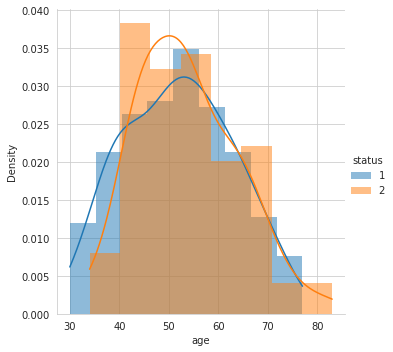

In [61]:
sns.FacetGrid(haberman, hue="status", height=5).map(sns.histplot,"age",label="100% Equities", kde=True, stat="density", linewidth=0).add_legend()
plt.show()

Observation:-from the above observation we can seen that patient whose age are between 30 to 40 year the chances is little higher to survive more than five year and the patient whose age are between 40 to 56 year chanses is little higher to died within five year but we are unable pridict anything form this plot

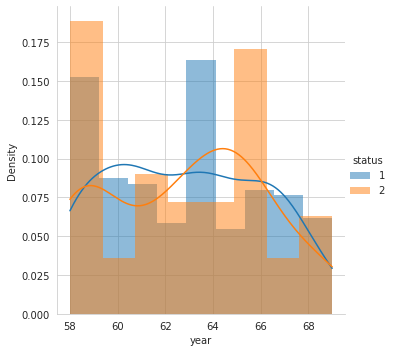

In [62]:
sns.FacetGrid(haberman, hue="status", height=5).map(sns.histplot,"year",label="100% Equities", kde=True, stat="density", linewidth=0).add_legend()
plt.show()


Observation:-we are unable to predict anything form this plot

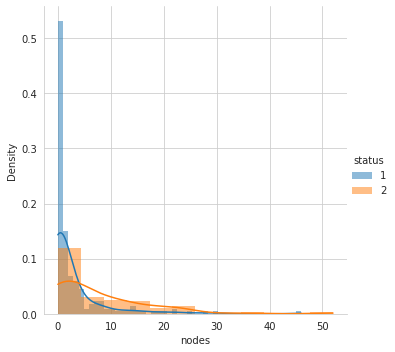

In [63]:
sns.FacetGrid(haberman, hue="status", height=5).map(sns.histplot, "nodes",label="100% Equities", kde=True, stat="density", linewidth=0).add_legend()
plt.show()

Observation:- form the above hist plot and pdf we can seen that the patient with nodes<5 is higher chances to survive more than five year

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


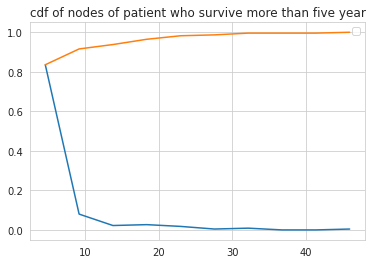

In [64]:
counts,bin_edges=np.histogram(haber_1['nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.title("cdf of nodes of patient who survive more than five year")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend()

Observation:-from the above plot we can clearly seen that if less no of node the chances is high to survive (if nodes<=3 chances of survival more than five year is approximate 82% as the number of nodes increases, chances of surviving more than five year become less and after nodes=40 chances are very less to survive more than five year

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


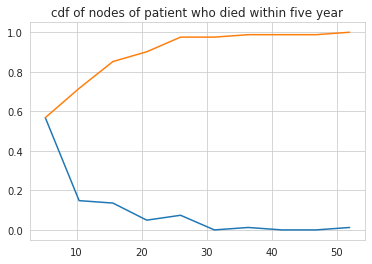

In [65]:
counts,bin_edges=np.histogram(haber_2['nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.title("cdf of nodes of patient who died within five year")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

Observation:-from the above cdf we can clearly seen that when no of nodes<=5 the chance to died with in five year is approximate 57%

[0.91555556 0.04888889 0.02222222 0.00888889 0.00444444]
[ 0.   9.2 18.4 27.6 36.8 46. ]
[0.71604938 0.18518519 0.07407407 0.01234568 0.01234568]
[ 0.  10.4 20.8 31.2 41.6 52. ]


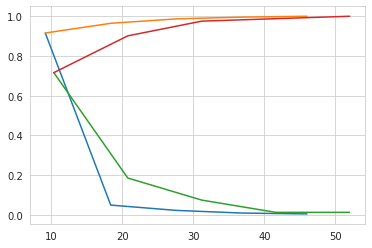

In [66]:
counts,bin_edges=np.histogram(haber_1['nodes'],bins=5,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(haber_2['nodes'],bins=5,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

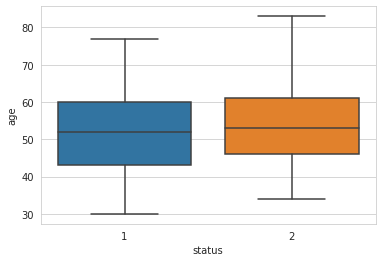

In [67]:
sns.boxplot(x="status",y='age',data=haberman)
plt.show()

Oservation:-from the above plot we can clearly seen that threshold for 1 is approximate 30 to 77 and 25th,50th,75th percentile are approximate 43,52 and 60 respectively 
threshold for 2 is approximate 34 to 80+ and 25th,50th,75th percentile are approximate 46,53 and 62.
mostly 1 and 2 are overlap each other so we are unable to distinguish them 

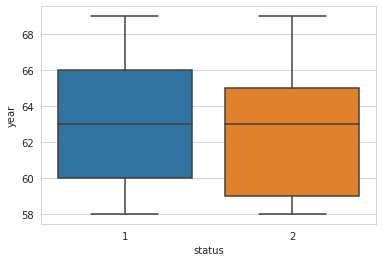

In [68]:
sns.boxplot(x="status",y='year',data=haberman)
plt.show()

Observation:-from the above plot we can clearly seen that threshold for 1 is approximate 58 to 69 and 25th,50th,75th percentile are approximate 60,63 and 66 respectively. 
threshold for 2 is same as for 1 and 25th,50th,75th percentile are approximate 59,63(same as for 1) and 65.
mostly 1 and 2 are overlap each other so we are unable to distinguish them

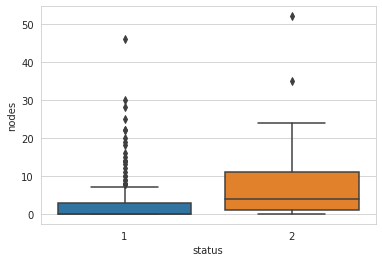

In [69]:
sns.boxplot(x="status",y='nodes',data=haberman)
plt.show()

Observation:- from the above plot we can clearly seen that threshold for 1 is approximate 0 to 7 there are some outlier present in the data and 25th,50th percentile is same for 1 (0) and 75th percentile is approximate 3. 
threshold for 2 is approximate 0 to 24, there is 2 outlier in 2 and 25th,50th,75th percentile are approximate 2,4 and 12 respectively.
so from the graph we can seen that if nodes<3 then chances is high to survive more than five year and as the number of nodes increases the chance to survive more than five year is reduces

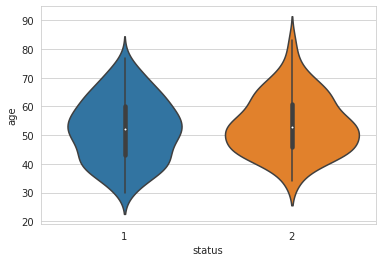

In [70]:
sns.violinplot(x="status",y="age",data=haberman,size=10)
plt.show()

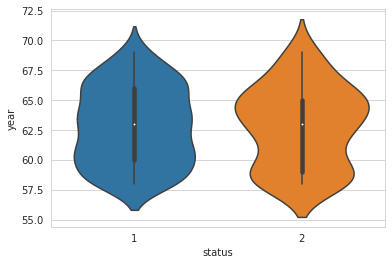

In [71]:
sns.violinplot(x="status",y="year",data=haberman,size=10)
plt.show()

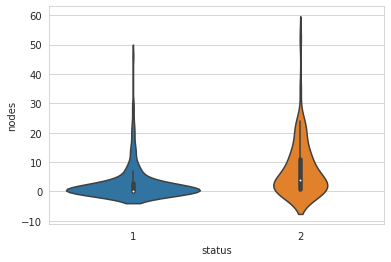

In [72]:
sns.violinplot(x="status",y="nodes",data=haberman,size=10)
plt.show()

Observation:- from the above plot we can seen that for 1, at node=0 density is very high as compare to 2, the spread of 2 is more as comapre to 1 that means  around nodes=0 chances is high to survive more than five year and as the number of nodes increases chances to survive more than five year is reduces and chances to died within five year is slightly high as compare to 1

###Multivariate analysis##

In [73]:
import plotly.express as px
fig=px.scatter_3d(haberman,x="age",y="year",z="nodes",color="status")
fig.show()

observation:-from the above graph we can clearly seen that a person with less number of nodes the chances is high to survive more than five year

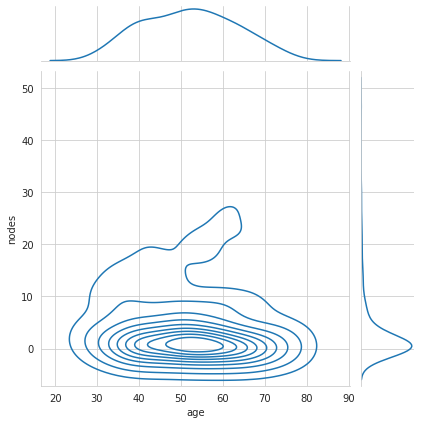

In [74]:
sns.jointplot(x="age",y="nodes",data=haber_1,kind="kde")
plt.show()

Observation:- from the above plot we can clearly seen that for age range 46 to 60 and nodes from 0-4 the density is very high

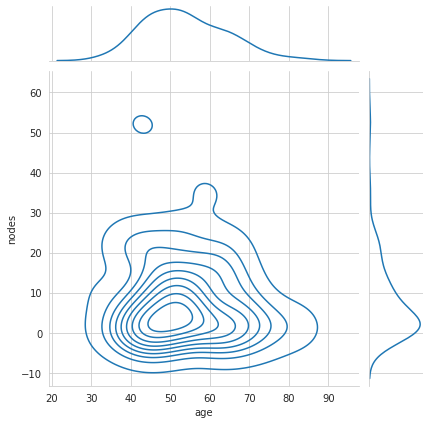

In [75]:
sns.jointplot(x="age",y="nodes",data=haber_2,kind="kde")
plt.show()

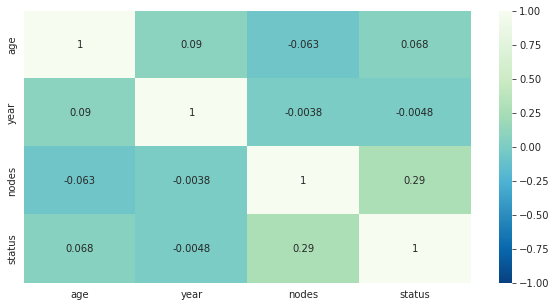

In [76]:
plt.figure(figsize=(10,5))
sns.heatmap(haberman.corr(),annot=True,vmax=1,vmin=-1,cmap="GnBu_r")
plt.show()

#### splitted the data 25% for testing purpose and 75% for training purpose

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(haberman.iloc[:,0:3], haberman.iloc[:,-1], test_size=0.25, random_state=42)

# Naive Bayes 

In [78]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7142857142857143

# Decision tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
y_pred_dt = dt.fit(x_train, y_train).predict(x_test)
accuracy_score(y_test, y_pred_dt)

0.6233766233766234

# Support Vector Machine

In [81]:
from sklearn.svm import SVC
sv = SVC(gamma='auto')
y_pred_sv = sv.fit(x_train, y_train).predict(x_test)
accuracy_score(y_test, y_pred_sv)

0.7142857142857143

# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
y_pred_rf = rf.fit(x_train, y_train).predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.7142857142857143

# K Nearest Neighbor

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
y_pred_knn = knn.fit(x_train, y_train).predict(x_test)
accuracy_score(y_test, y_pred_knn)

0.7402597402597403